## **Parallel processing performance**

Change root directory

In [7]:
import os
#os.chdir('/home/iaapp/brayan/helmholtzSim')
os.chdir('/home/bespi123/git/helmholtzCoilsDesigner')

print(os.getcwd())

/home/bespi123/git/helmholtzCoilsDesigner


Import Libraries

In [8]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot

from memory_profiler import memory_usage  # Import memory profiler


Simulation Settings

In [9]:
# Initialize coil parameters
number_of_spires = 2
size_length =  1.05 
distance_among_spires = 0.59
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.01
num_seg = 100           #Numer of segments 

Spawn Helmholtz coils spires

In [10]:
##Spawn spires
spire_x_s = X_coil.square_spires(num_seg)
print(spire_x_s.shape)
##PLot spires
f0 = None
f0 = hplot.plot_spires(f0, spire_x_s, color='black', row=None, col=None)

f0.show()

(2, 3, 400)


Spawn simulation Grid

In [11]:
# Generar grid
X, Y, Z = sim.generate_range([-0.8, 0.8],[-0.8, 0.8], [-0.8, 0.8], step_size_x = grid_length_size)
print(X.shape[0])
hplot.plot_grid(X, Y, Z, f0)

79219


Simulation with variable parallel_coils and batch_size

In [ ]:
import time
import numpy as np
import pandas as pd
from memory_profiler import memory_usage  # Import memory profiler
from src import helmCoils_simulator as sim

# Initialize a list to store execution times and memory usage
execution_data = []

# Start the simulation
for parallel_coils in range(1, spire_x_s.shape[2], 50):
    print('n_spires:', parallel_coils)
    
    for batch_Size in range(1, X.shape[0], 100):
        # Measure memory usage while running the function
        start_time = time.time()

        mem_usage, x_coil_results_s = memory_usage(
            (sim.coil_simulation_parallel, (X, Y, Z, X_coil, spire_x_s, batch_Size), {'enable_progress_bar': False, 'n': parallel_coils}),
            max_usage=True,  # Get peak memory usage
            retval=True  # Return function output
        )

        end_time = time.time()
        execution_time = end_time - start_time
        print(f'coils{parallel_coils}, batch size {batch_Size}, time. {execution_time}, Memory usage: {mem_usage}')
        
        # Store the results
        execution_data.append([parallel_coils, batch_Size, execution_time, mem_usage])

# Convert to DataFrame
df = pd.DataFrame(execution_data, columns=['n_spires', 'batch_Size', 'execution_time', 'peak_memory_MB'])

# Save results
df.to_csv('data/parallel_test.csv', index=False)
print("Execution times and memory usage have been saved to 'parallel_test.csv'.")

    

n_spires: 1


Simulation Progress:   0%|          | 2/79219 [00:00<7:09:07,  3.08it/s]

Simulation Progress:   1%|          | 461/79219 [01:15<3:35:43,  6.08it/s]Process ForkPoolWorker-3693:
Process ForkPoolWorker-3694:
Process ForkPoolWorker-3696:
Process ForkPoolWorker-3695:
Process ForkPoolWorker-3690:
Process MemTimer-1:
Process ForkPoolWorker-3691:
Process ForkPoolWorker-3697:
Process ForkPoolWorker-3692:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bespi123/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/bespi123/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/bespi123/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/bespi123/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  Fi

Plot obtained results

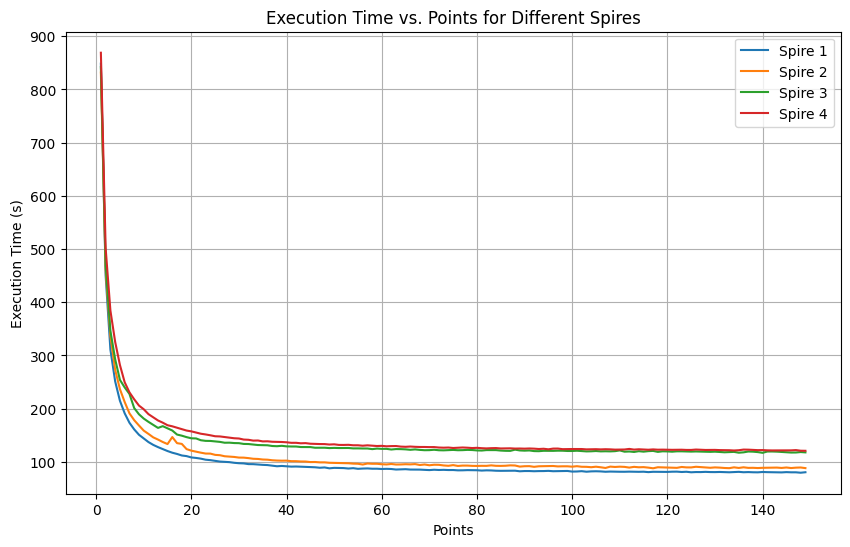

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
for n in df['n_spires'].unique():
    subset = df[df['n_spires'] == n]
    plt.plot(subset['points'], subset['execution_time'], label=f"Spire {n}")

plt.title("Execution Time vs. Points for Different Spires")
plt.xlabel("Points")
plt.ylabel("Execution Time (s)")
plt.legend()
plt.grid(True)
plt.show()